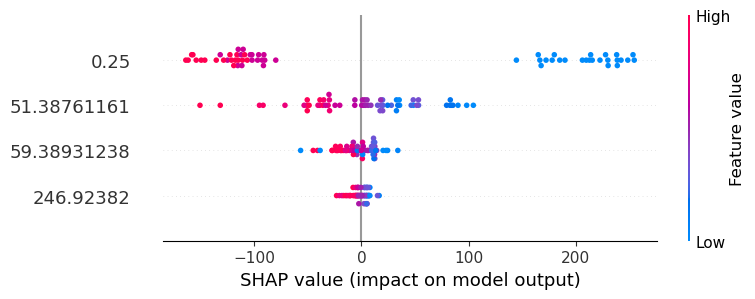

Plotting dependence plot for 246.92382...


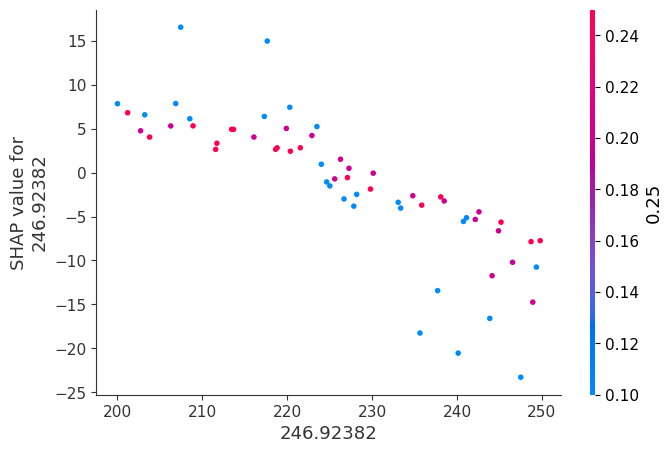

Plotting dependence plot for 59.38931238...


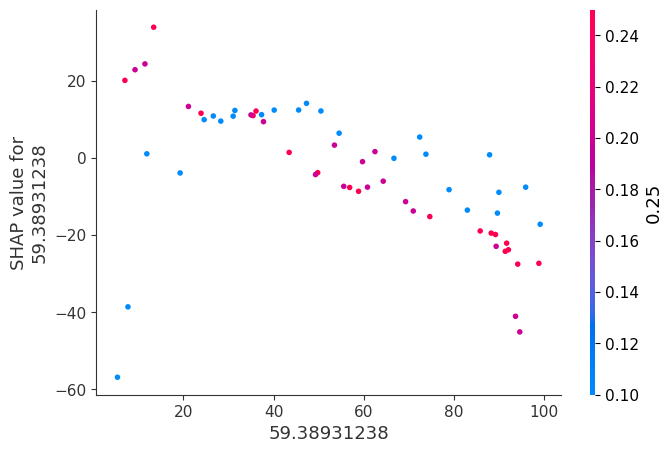

Plotting dependence plot for 51.38761161...


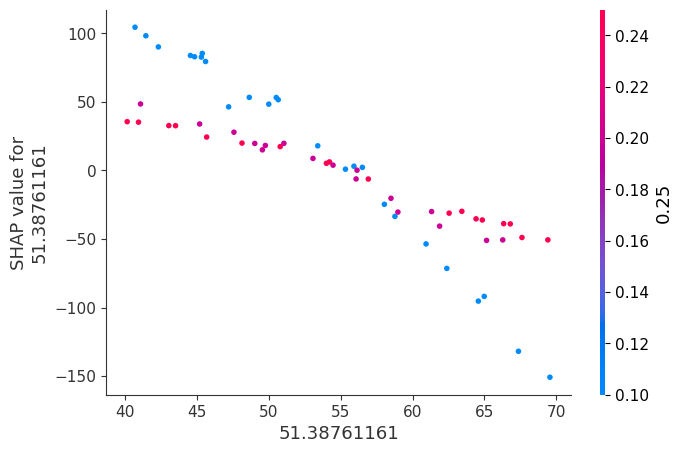

Plotting dependence plot for 0.25...


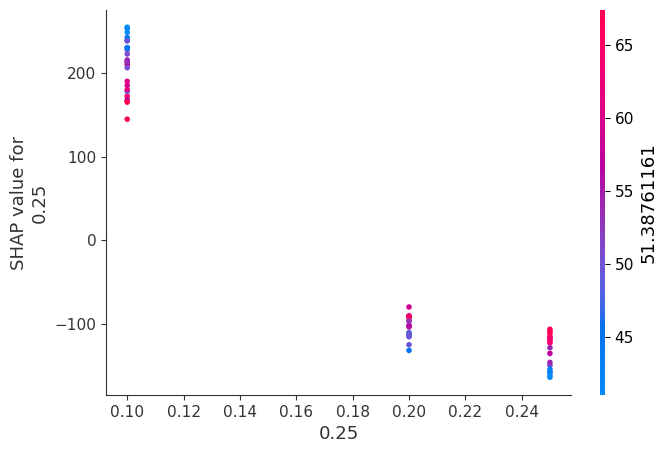

Plotting force plot for sample index 0...


In [5]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Example model
from matplotlib import pyplot as plt
# Load your dataset from Data_new_thermal.csv
data = pd.read_csv('Data_new_thermal.csv')

# Split data into input features (X) and output target (y)
# Assume the last column is the output variable; adjust accordingly if needed
X = data.iloc[:, :-1]  # All columns except the last one are input features
y = data.iloc[:, -1]   # The last column is the output target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., RandomForestRegressor)
# You can replace the model with any model you prefer
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Plot SHAP dependence plot for individual variable effect
# Iterate over each feature in X_test and create a dependence plot
for i, column in enumerate(X_test.columns):
    print(f"Plotting dependence plot for {column}...")
    shap.dependence_plot(i, shap_values, X_test)

# Plot SHAP force plot for individual samples
# You can specify the index of the sample in X_test you want to visualize
# Here, we plot for the first sample (index 0)
sample_index = 0
print(f"Plotting force plot for sample index {sample_index}...")
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])

# To visualize the force plot in a notebook, comment out the line below:
plt.show()


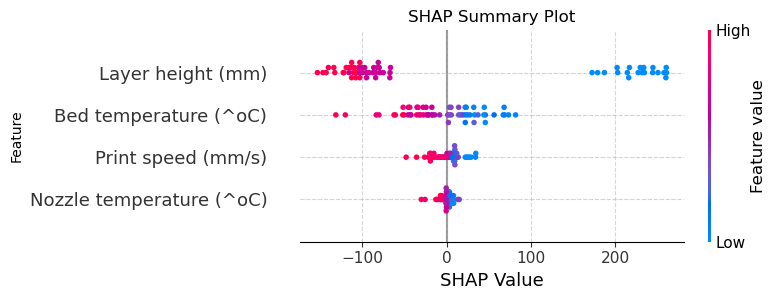

<Figure size 800x600 with 0 Axes>

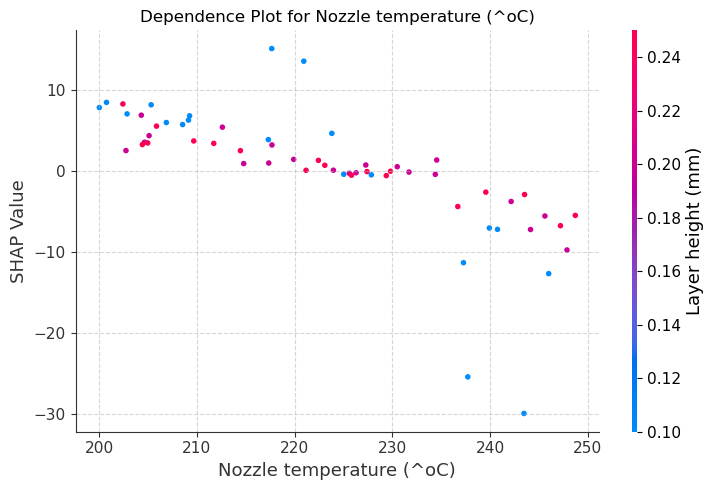

FileNotFoundError: [Errno 2] No such file or directory: 'dependence_plot_Print speed (mm/s).png'

<Figure size 800x600 with 0 Axes>

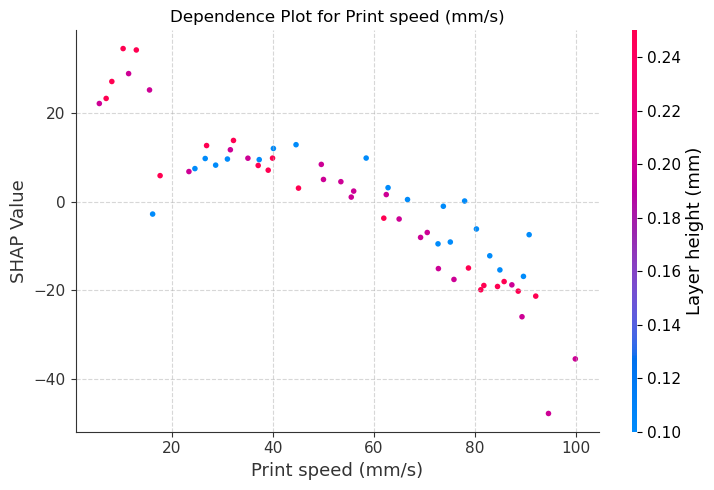

In [9]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Define the column names for your dataset
column_names = ['Nozzle temperature (^oC)', 'Print speed (mm/s)', 'Bed temperature (^oC)',
                'Layer height (mm)', 'Cooling rate (^oC/s)']

# Load your dataset from Data_new_thermal.csv and specify the column names
data = pd.read_csv('Data_new_thermal.csv', names=column_names)

# Split data into input features (X) and output target (y)
X = data[['Nozzle temperature (^oC)', 'Print speed (mm/s)', 'Bed temperature (^oC)',
          'Layer height (mm)']]
y = data['Cooling rate (^oC/s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., RandomForestRegressor)
# You can replace the model with any model you prefer
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot with customization for publication quality
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type='dot', show=False)
plt.title('SHAP Summary Plot')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)  # Save plot as a high-resolution image
plt.show()

# Plot SHAP dependence plot for each feature with customization for publication quality
for i, column in enumerate(X_test.columns):
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(i, shap_values, X_test, show=False)
    plt.title(f'Dependence Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('SHAP Value')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'dependence_plot_{column}.png', dpi=300)  # Save plot as a high-resolution image
    plt.show()

# Plot SHAP force plot for individual samples
# You can specify the index of the sample in X_test you want to visualize
# Here, we plot for the first sample (index 0)
sample_index = 0
print(f"Plotting force plot for sample index {sample_index}...")

# Visualize the force plot for the specified sample
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])


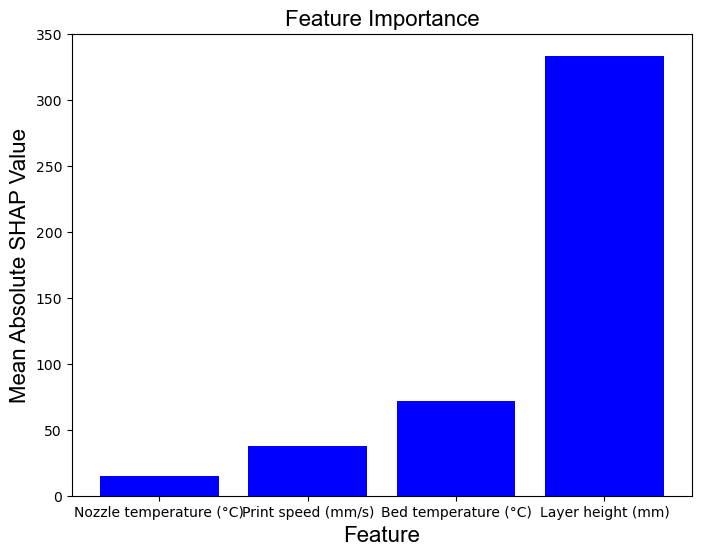

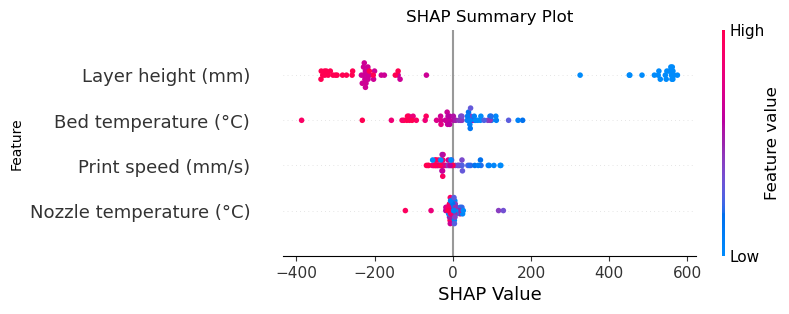

<Figure size 800x600 with 0 Axes>

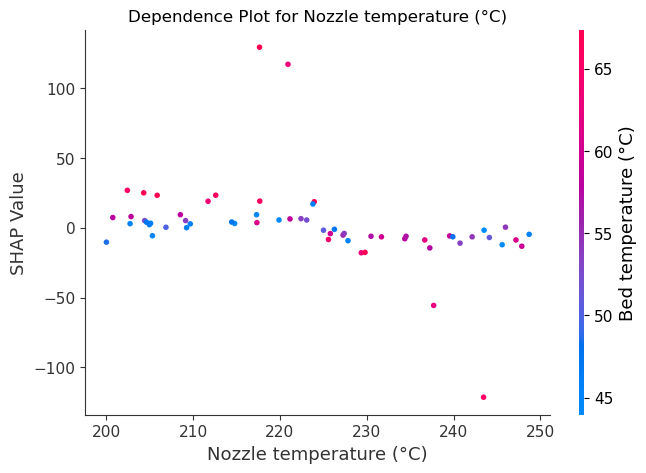

<Figure size 800x600 with 0 Axes>

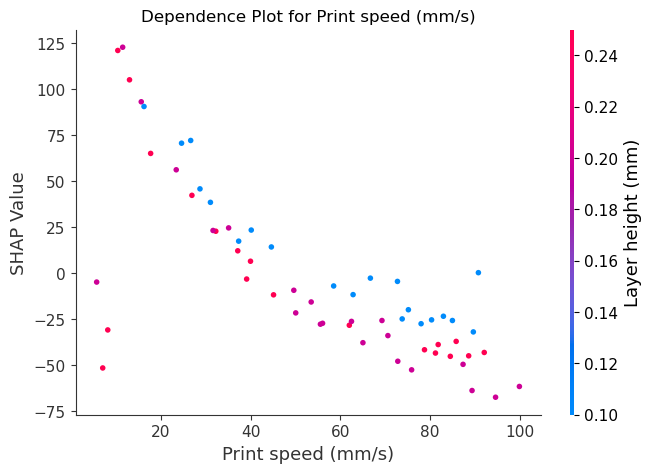

<Figure size 800x600 with 0 Axes>

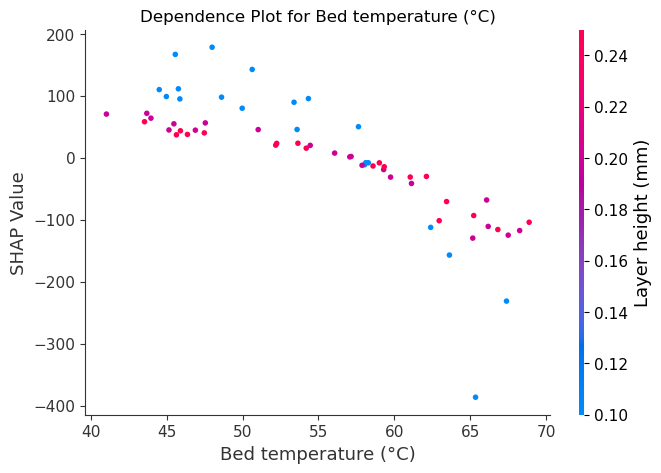

<Figure size 800x600 with 0 Axes>

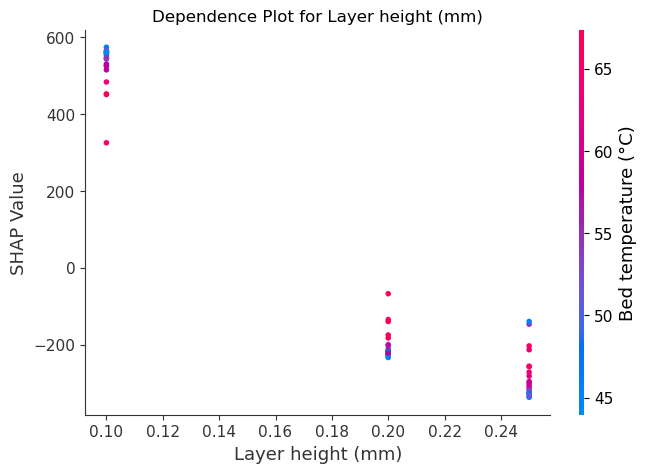

Plotting force plot for sample index 0...


In [60]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define the column names for your dataset
column_names = ['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
                'Layer height (mm)', 'Cooling rate (°C/s)']

# Load your dataset from Data_new_thermal.csv and specify the column names
data = pd.read_csv('Data_new_thermal2.csv', names=column_names)

# Split data into input features (X) and output target (y)
X = data[['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
          'Layer height (mm)']]
y = data['Cooling rate (°C/s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., RandomForestRegressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Create a bar plot showing the mean absolute SHAP values for each feature
plt.figure(figsize=(8, 6))
plt.bar(X.columns, mean_abs_shap_values, color='blue')

# Set axis labels and title using Arial 16 fonts
plt.xlabel('Feature', fontsize=16, fontname='Arial')
plt.ylabel('Mean Absolute SHAP Value', fontsize=16, fontname='Arial')
plt.title('Feature Importance', fontsize=16, fontname='Arial')

# Display the plot
plt.show()

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='dot', show=False)
plt.title('SHAP Summary Plot')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.show()

# Plot SHAP dependence plot for each feature
for i, column in enumerate(X_test.columns):
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(i, shap_values, X_test, show=False)
    plt.title(f'Dependence Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('SHAP Value')
    plt.show()

# Plot SHAP force plot for individual samples
# Specify the index of the sample in X_test you want to visualize
# Here, we plot for the first sample (index 0)
sample_index = 0
print(f"Plotting force plot for sample index {sample_index}...")

# Visualize the force plot for the specified sample
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])

# You can comment out the plt.show() lines in a script to not show the plot immediately, but rather save them as images.



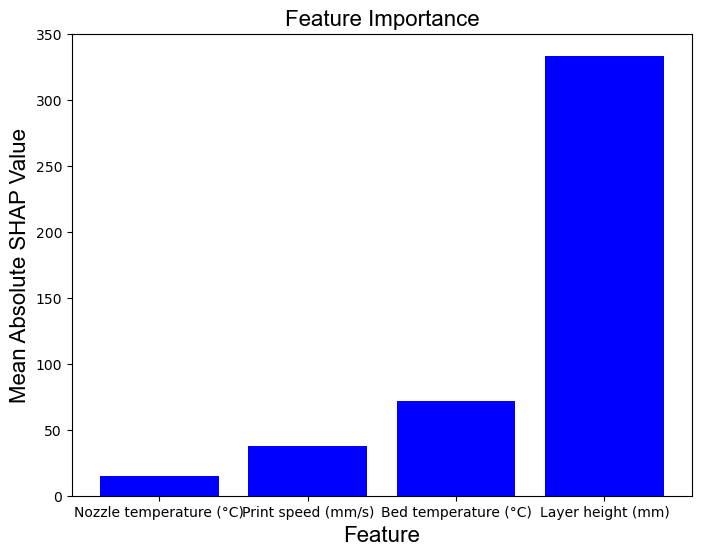

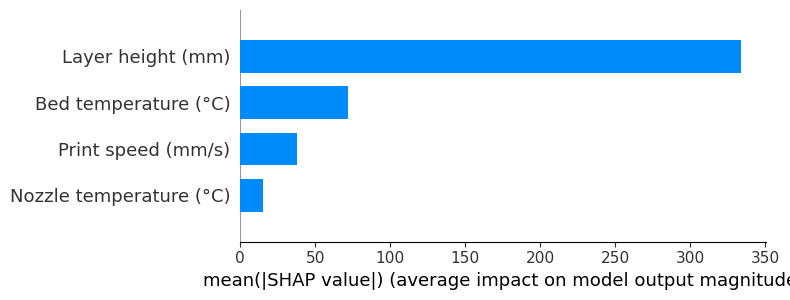

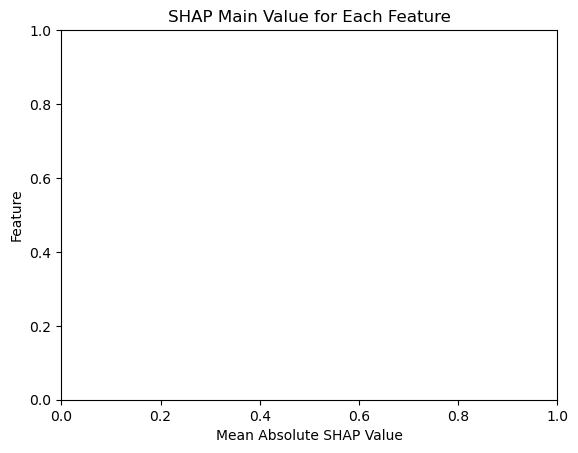

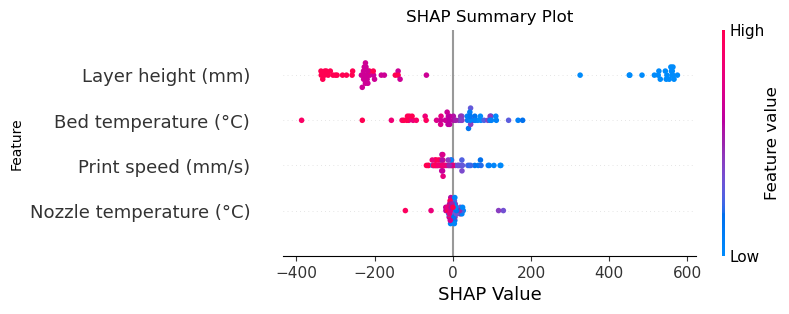

<Figure size 800x600 with 0 Axes>

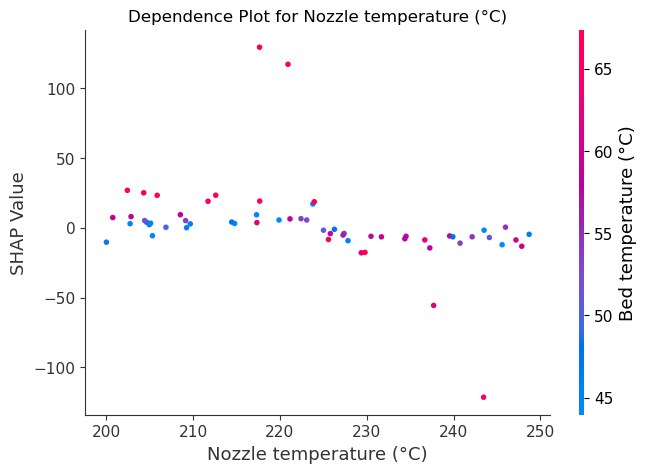

<Figure size 800x600 with 0 Axes>

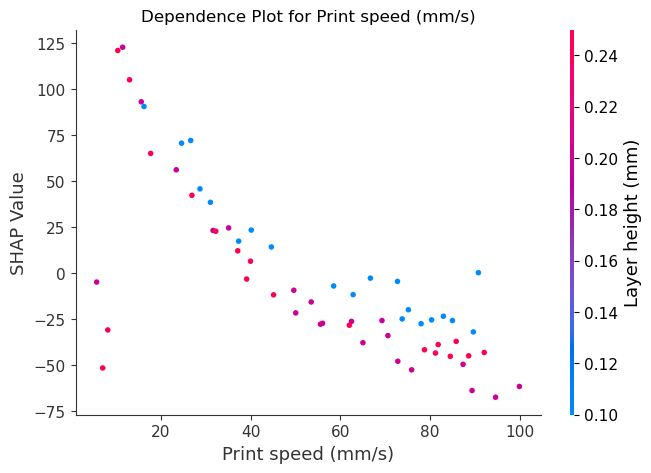

<Figure size 800x600 with 0 Axes>

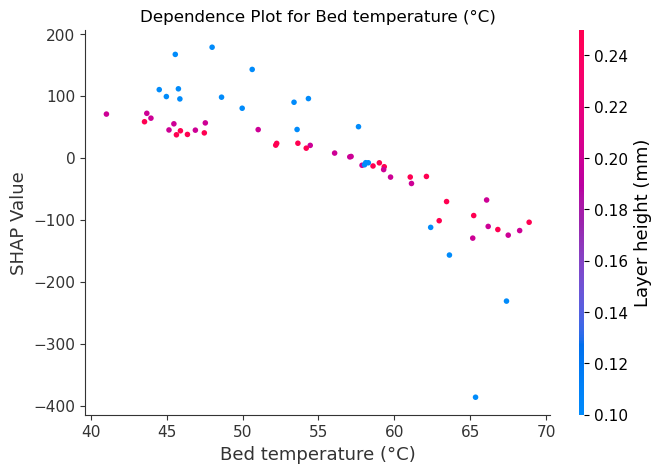

<Figure size 800x600 with 0 Axes>

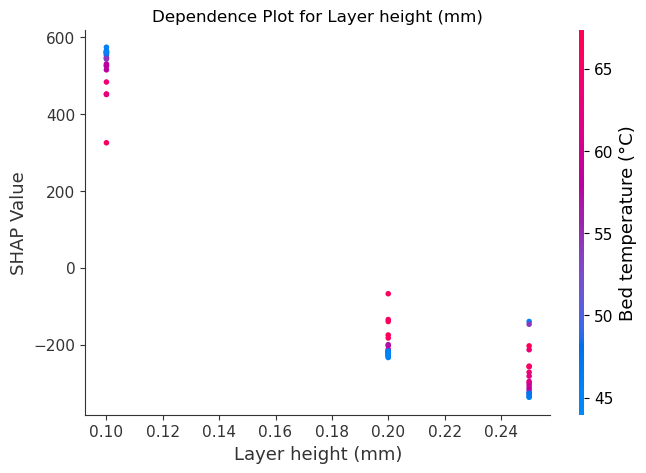

Plotting force plot for sample index 0...


In [16]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define the column names for your dataset
column_names = ['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
                'Layer height (mm)', 'Cooling rate (°C/s)']

# Load your dataset from Data_new_thermal.csv and specify the column names
data = pd.read_csv('Data_new_thermal2.csv', names=column_names)

# Split data into input features (X) and output target (y)
X = data[['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
          'Layer height (mm)']]
y = data['Cooling rate (°C/s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., RandomForestRegressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Create a bar plot showing the mean absolute SHAP values for each feature
plt.figure(figsize=(8, 6))
plt.bar(X.columns, mean_abs_shap_values, color='blue')

# Set axis labels and title using Arial 16 fonts
plt.xlabel('Feature', fontsize=16, fontname='Arial')
plt.ylabel('Mean Absolute SHAP Value', fontsize=16, fontname='Arial')
plt.title('Feature Importance', fontsize=16, fontname='Arial')

# Display the plot
plt.show()

# **Updated section**: SHAP summary plot (bar plot for main effects)
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.title('SHAP Main Value for Each Feature')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.show()

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='dot', show=False)
plt.title('SHAP Summary Plot')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.show()

# Plot SHAP dependence plot for each feature
for i, column in enumerate(X_test.columns):
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(i, shap_values, X_test, show=False)
    plt.title(f'Dependence Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('SHAP Value')
    plt.show()

# Plot SHAP force plot for individual samples
# Specify the index of the sample in X_test you want to visualize
# Here, we plot for the first sample (index 0)
sample_index = 0
print(f"Plotting force plot for sample index {sample_index}...")

# Visualize the force plot for the specified sample
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])


In [29]:
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define the column names for your dataset
column_names = ['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
                'Layer height (mm)', 'Cooling rate (°C/s)']

# Load your dataset from Data_new_thermal.csv and specify the column names
data = pd.read_csv('Data_new_thermal2.csv', names=column_names)

# Split data into input features (X) and output target (y)
X = data[['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
          'Layer height (mm)']]
y = data['Cooling rate (°C/s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., RandomForestRegressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
#explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
#shap_values = explainer.shap_values(X_test)




In [30]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

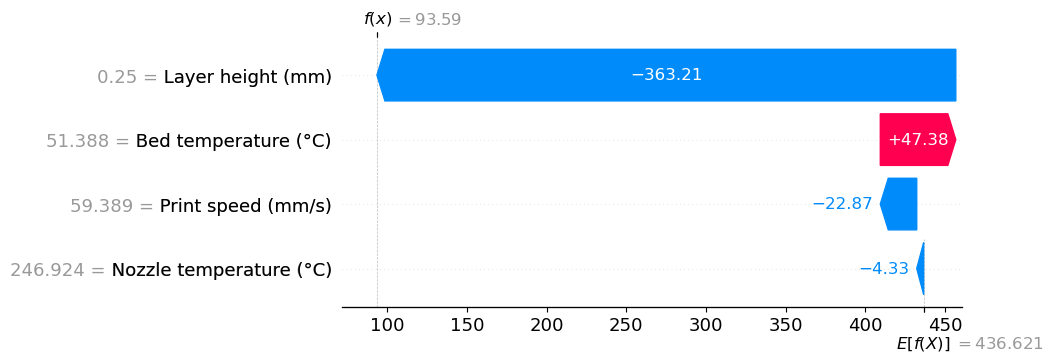

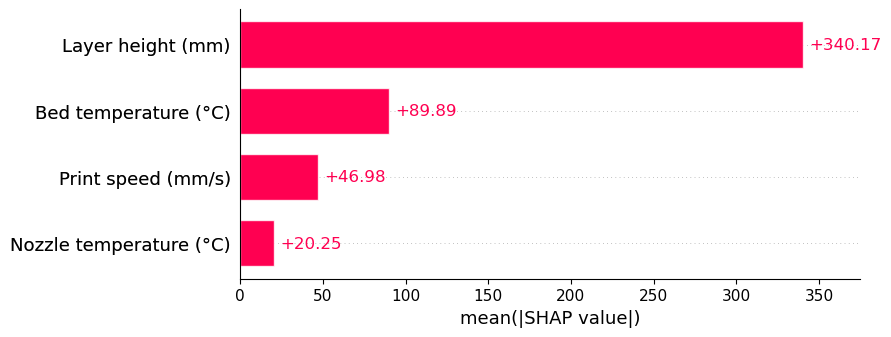

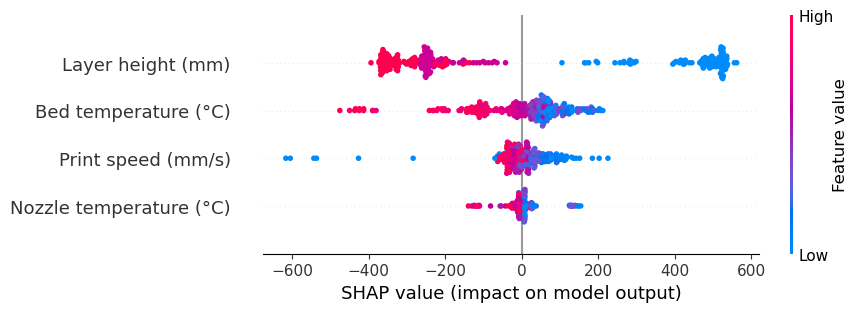

In [34]:
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[0])
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)

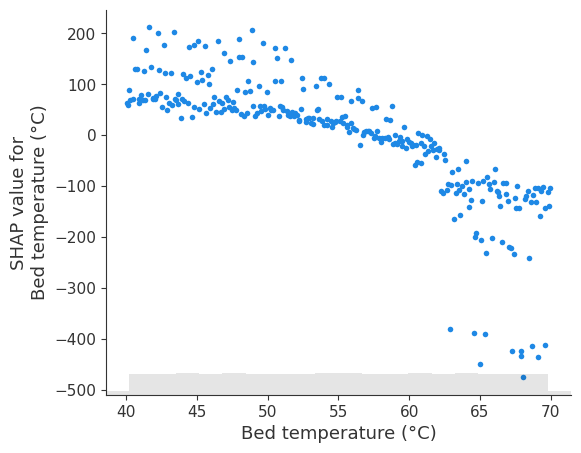

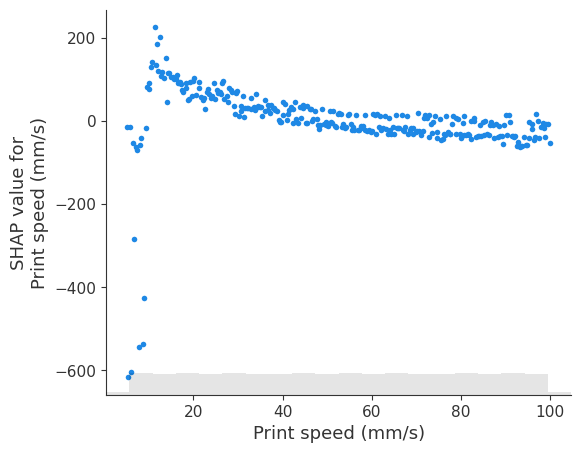

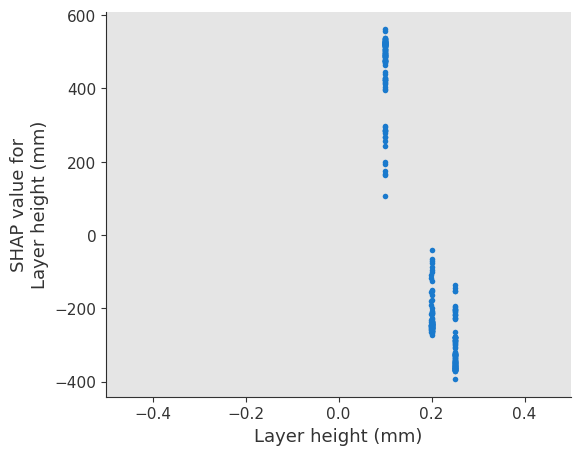

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [58]:
shap.plots.scatter(shap_values[:,"Bed temperature (°C)"])
shap.plots.scatter(shap_values[:,"Print speed (mm/s)"])
shap.plots.scatter(shap_values[:,"Layer height (mm)"])
shap.plots.scatter(shap_values[:,"Cooling rate (°C/s)"])


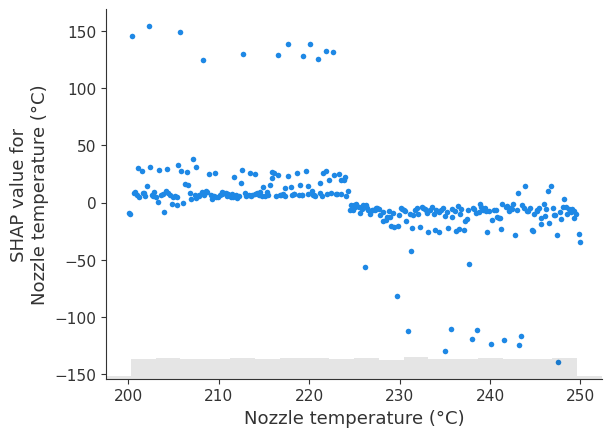

<Figure size 640x480 with 0 Axes>

In [43]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is your SHAP values object and it contains a feature "Nozzle temperature (°C)"
# Calculate shap_values if you haven't done so already

# Create a new figure
fig, ax = plt.subplots()

# Create the SHAP scatter plot for the specified feature
shap.plots.scatter(shap_values[:,"Nozzle temperature (°C)"], ax=ax)

# Set the line color for the spines (axes borders) to black
for spine in ax.spines.values():
    spine.set_color('black')

# Alternatively, you can set the spines' visibility and line style like this:
ax.spines['top'].set_linewidth(1.5)
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth(1.5)
ax.spines['right'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

# Save the plot with 300 dpi resolution
plt.savefig('shap_scatter_plot.png', dpi=300)

# Show the plot
plt.show()



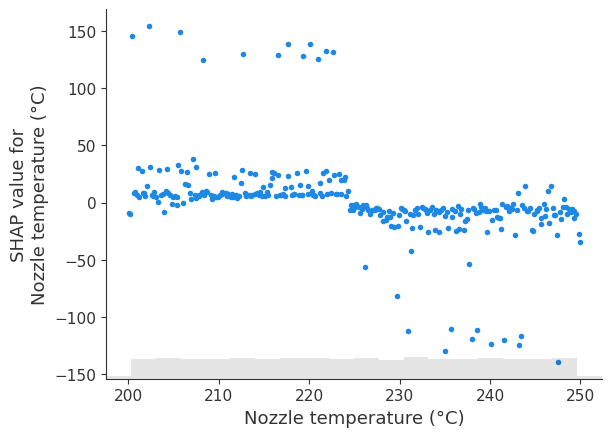

<Figure size 640x480 with 0 Axes>

In [52]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming shap_values is your SHAP values object and it contains a feature "Nozzle temperature (°C)"
# Assuming shap_values is a dictionary-like object

# Extract feature and shap values
feature = shap_values.data[:, shap_values.feature_names.index("Nozzle temperature (°C)")]
shap_vals = shap_values.values[:, shap_values.feature_names.index("Nozzle temperature (°C)")]

# Calculate linear regression
regression_model = LinearRegression()
regression_model.fit(feature.reshape(-1, 1), shap_vals)

# Get the regression line
x = np.linspace(feature.min(), feature.max(), 100)
y = regression_model.predict(x.reshape(-1, 1))

# Create a new figure
fig, ax = plt.subplots()

# Create the SHAP scatter plot for the specified feature
shap.plots.scatter(shap_values[:, "Nozzle temperature (°C)"], ax=ax)

# Plot the regression line
ax.plot(x, y, color='red', label='Regression line')

# Add a legend to the plot
ax.legend()

# Set the line color for the spines (axes borders) to black
for spine in ax.spines.values():
    spine.set_color('black')

# Alternatively, you can set the spines' visibility and line style like this:
ax.spines['top'].set_linewidth(1.5)
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth(1.5)
ax.spines['right'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

# Save the plot with 300 dpi resolution
plt.savefig('shap_scatter_plot.png', dpi=300)

# Show the plot
plt.show()


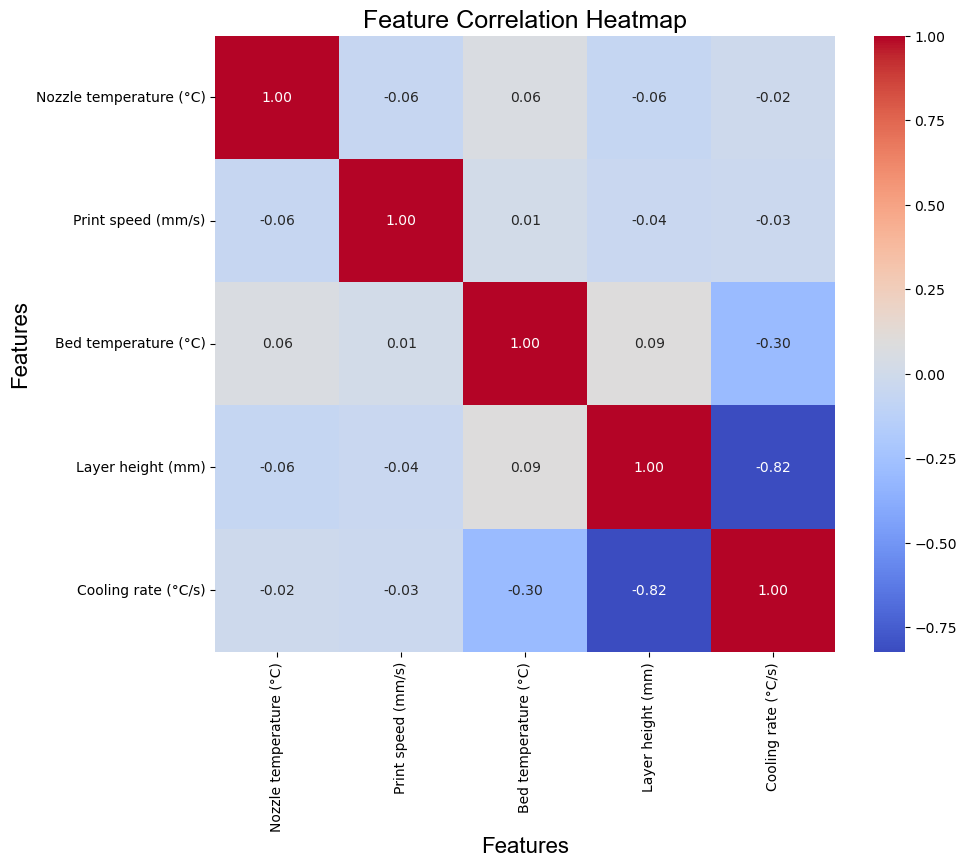

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the column names for your dataset
column_names = ['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
                'Layer height (mm)', 'Cooling rate (°C/s)']

# Load your dataset from Data_new_thermal.csv and specify the column names
data = pd.read_csv('Data_new_thermal2.csv', names=column_names)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title and axis labels
plt.title('Feature Correlation Heatmap', fontsize=18, fontname='Arial')
plt.xlabel('Features', fontsize=16, fontname='Arial')
plt.ylabel('Features', fontsize=16, fontname='Arial')

# Show the heatmap
plt.show()


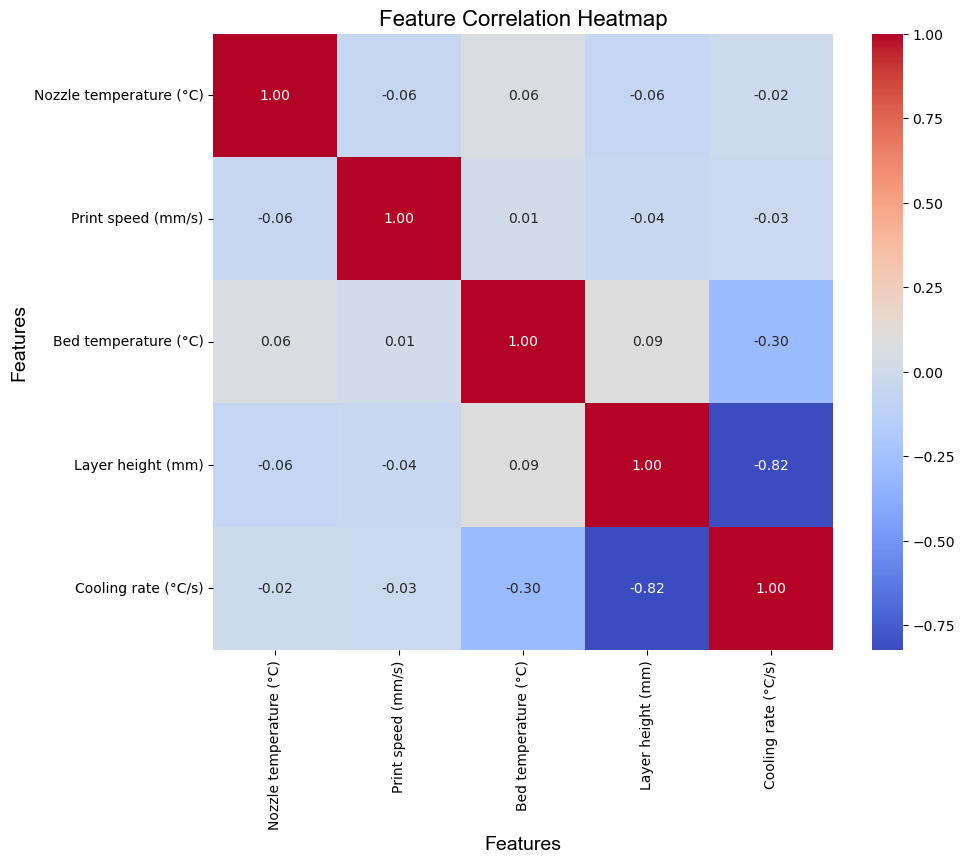

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the column names for your dataset
column_names = ['Nozzle temperature (°C)', 'Print speed (mm/s)', 'Bed temperature (°C)',
                'Layer height (mm)', 'Cooling rate (°C/s)']

# Load your dataset from Data_new_thermal.csv and specify the column names
data = pd.read_csv('Data_new_thermal2.csv', names=column_names)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title and axis labels
plt.title('Feature Correlation Heatmap', fontsize=16, fontname='Arial')
plt.xlabel('Features', fontsize=14, fontname='Arial')
plt.ylabel('Features', fontsize=14, fontname='Arial')

# Show the heatmap
plt.show()
